In [1]:
import os
import argparse
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import sys
sys.argv = ['']

from modules import *

In [63]:
# parse args
parser = argparse.ArgumentParser()

# job parameters
parser.add_argument('--jobid', type = str, default = '0', help = 'job id')
parser.add_argument('--path', type = str, default = os.path.join(os.getcwd(), 'results'), help = 'path to store results')

# nework parameters
parser.add_argument('--hidden_size', type = int, default = 32, help = 'hidden size')

# environment parameters
parser.add_argument('--num_items', type = int, default = 3, help = 'number of items')
parser.add_argument('--num_targets', type = float, default = 6, help = 'number of targets')
parser.add_argument('--t_delay', type = float, default = 1, help = 'delay time')

args = parser.parse_args()

In [64]:
# set experiment path
exp_path = './results/exp_em'

In [65]:
# load net
net = torch.load(os.path.join(exp_path, f'net.pth'))

# load data
with open(os.path.join(exp_path, f'data_simulation.p'), 'rb') as f:
    data = pickle.load(f)
num_trials = len(data['items'])
print(data.keys())

dict_keys(['items', 'hidden_seqs'])


In [66]:
items = np.array(data['items']) # (num_trials, num_items)
hiddens = np.array(data['hidden_seqs']) # (num_trials, num_steps, hidden_size)

print(items.shape)
print(hiddens.shape)

(10000, 3)
(10000, 7, 32)


(10000, 3, 2)


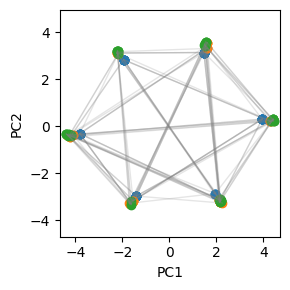

In [67]:
hiddens_decoding = hiddens[:, :args.num_items, :] # get the last 3 stpes
hiddens_decoding = hiddens_decoding.reshape(-1, args.hidden_size)
hiddens_decoding.shape

pca = PCA(n_components = 2)
hiddens_projected = pca.fit_transform(hiddens_decoding)
hiddens_projected = hiddens_projected.reshape((num_trials, args.num_items, 2))
print(hiddens_projected.shape)

num_trials_to_plot = 50

plt.figure(figsize = (3, 3))
for i in range(3):
    plt.scatter(hiddens_projected[:num_trials_to_plot, i, 0], hiddens_projected[:num_trials_to_plot, i, 1])

for k in range(num_trials_to_plot):
    for t in range(args.num_items - 1):
        plt.plot(
            [hiddens_projected[k, t, 0], hiddens_projected[k, t + 1, 0]],
            [hiddens_projected[k, t, 1], hiddens_projected[k, t + 1, 1]], 
            color = 'gray', linewidth = 1, alpha = 0.2
        )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal')
plt.tight_layout()
plt.show()

(10000, 3, 2)


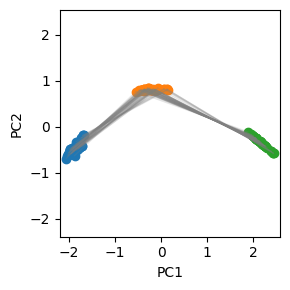

In [68]:
hiddens_encoding = hiddens[:, -args.num_items:, :] # get the last 3 stpes
hiddens_encoding = hiddens_encoding.reshape(-1, args.hidden_size)
hiddens_encoding.shape

pca = PCA(n_components = 2)
hiddens_projected = pca.fit_transform(hiddens_encoding)
hiddens_projected = hiddens_projected.reshape((num_trials, args.num_items, 2))
print(hiddens_projected.shape)

num_trials_to_plot = 50

plt.figure(figsize = (3, 3))
for i in range(3):
    plt.scatter(hiddens_projected[:num_trials_to_plot, i, 0], hiddens_projected[:num_trials_to_plot, i, 1])

for k in range(num_trials_to_plot):
    for t in range(args.num_items - 1):
        plt.plot(
            [hiddens_projected[k, t, 0], hiddens_projected[k, t + 1, 0]],
            [hiddens_projected[k, t, 1], hiddens_projected[k, t + 1, 1]], 
            color = 'gray', linewidth = 1, alpha = 0.2
        )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal')
plt.tight_layout()
plt.show()